In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train_df = pd.read_csv("data/train-small.csv")

In [5]:
print(train_df.head())

              Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855  

In [6]:
class_counts = train_df.sum()
print(class_counts)

Image                 00008270_015.png00029855_001.png00001297_000.p...
Atelectasis                                                         106
Cardiomegaly                                                         20
Consolidation                                                        33
Edema                                                                16
Effusion                                                            128
Emphysema                                                            13
Fibrosis                                                             14
Hernia                                                                2
Infiltration                                                        175
Mass                                                                 45
Nodule                                                               54
PatientId                                                      14742252
Pleural_Thickening                                              

In [7]:
class_counts = train_df.sum().drop(["Image", "PatientId"])
print(class_counts)

Atelectasis           106
Cardiomegaly           20
Consolidation          33
Edema                  16
Effusion              128
Emphysema              13
Fibrosis               14
Hernia                  2
Infiltration          175
Mass                   45
Nodule                 54
Pleural_Thickening     21
Pneumonia              10
Pneumothorax           38
dtype: object


In [10]:
for class_name, class_count in class_counts.items():
    print(f"The class {class_name} has {class_count} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


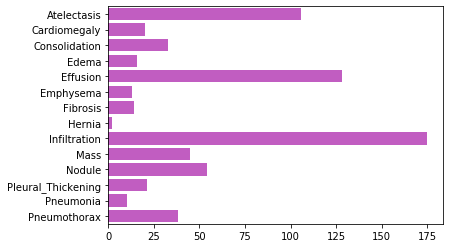

In [20]:
sns.barplot(class_counts.values, class_counts.keys(), color='m', alpha=0.7)

In [22]:
y_true = np.array([[1], [1], [1], [0]])
print(f"y_true:\n {y_true}")

y_true:
 [[1]
 [1]
 [1]
 [0]]


In [28]:
y_pred_1 = 0.9 * np.ones((y_true.shape))
print(f"y_pred_1: \n{y_pred_1}")
y_pred_2 = 0.1 * np.ones((y_true.shape))
print(f"y_pred_2: \n{y_pred_2}")

y_pred_1: 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]
y_pred_2: 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


In [34]:
loss_reg_1 = np.sum(-1 * (y_true * np.log(y_pred_1)) + (-1 * (1 - y_true) * np.log(1 - y_pred_1)))
print(f"loss_reg_1: {loss_reg_1:.4f}")

loss_reg_1: 2.6187


In [35]:
loss_reg_2 = np.sum(-(y_true * np.log(y_pred_2)) + (-(1-y_true) * np.log(1-y_pred_2)))
print(f"loss_reg_2: {loss_reg_2:.4f}")

loss_reg_2: 7.0131


In [40]:
w_p = np.sum(y_true == 0) / y_true.shape[0]
w_n = 1 - w_p
print(f"Positive weight: {w_p}")
print(f"Negative weight: {w_n}")

Positive weight: 0.25
Negative weight: 0.75


In [43]:
loss_1_pos = np.sum(-(w_p * y_true * np.log(y_pred_1)))
loss_1_neg = np.sum(-(w_n * (1 - y_true) * np.log(1 - y_pred_1)))
loss_1 = loss_1_pos + loss_1_neg
print(f"loss_1_pos: {loss_1_pos:.4f}")
print(f"loss_1_neg: {loss_1_neg:.4f}")
print(f"loss_1: {loss_1:.4f}")

loss_1_pos: 0.0790
loss_1_neg: 1.7269
loss_1: 1.8060


In [44]:
loss_2_pos = np.sum(-(w_p * y_true * np.log(y_pred_2)))
loss_2_neg = np.sum(-(w_n * (1-y_true) * np.log(1-y_pred_2)))
loss_2 = loss_2_pos + loss_2_neg
print(f"loss_2_pos: {loss_2_pos:.4f}")
print(f"loss_2_neg: {loss_2_neg:.4f}")
print(f"loss_2: {loss_2:.4f}")

loss_2_pos: 1.7269
loss_2_neg: 0.0790
loss_2: 1.8060


In [45]:
y_true = np.array([[1, 0], [1, 0], [1, 0], [1, 0], [0, 1]])
print(f"y_true: \n{y_true}")

y_true: 
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


In [46]:
print(f"Sum over axis=0: {np.sum(y_true, axis=0)}")
print(f"Sum over axis=1: {np.sum(y_true, axis=1)}")

Sum over axis=0: [4 1]
Sum over axis=1: [1 1 1 1 1]


In [50]:
w_p = np.sum(y_true == 0, axis=0) / y_true.shape[0]
w_n = np.sum(y_true == 1, axis=0) / y_true.shape[0]
print(f"Positive class weight: {w_p}")
print(f"Negative class weight: {w_n}")

Positive class weight: [0.2 0.8]
Negative class weight: [0.8 0.2]


In [55]:
y_pred = np.ones(y_true.shape)
y_pred[:, 0] = 0.3  
y_pred[:, 1] = 0.7 
print(f"y_pred: \n{y_pred}")

y_pred: 
[[0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]
 [0.3 0.7]]


In [57]:
print(f"y_true=0: {y_true[:, 0]}")
print(f"y_pred=0: {y_pred[:, 0]}")
print(f"w_p: {w_p[0]}")

y_true=0: [1 1 1 1 0]
y_pred=0: [0.3 0.3 0.3 0.3 0.3]
w_p: 0.2


In [61]:
loss_0_pos = np.sum(-(w_p[0] * y_true[:, 0] * np.log(y_pred[:, 0])))
loss_0_neg = np.sum(-(w_n[0] * (1 - y_true[:, 0])) * np.log(1 - y_pred[:, 0]))
loss_0 = loss_0_pos + loss_0_neg
print(f"loss_0_pos: {loss_0_pos:.4f}")
print(f"loss_0_neg: {loss_0_neg:.4f}")
print(f"loss_0: {loss_0:.4f}")

loss_0_pos: 0.9632
loss_0_neg: 0.2853
loss_0: 1.2485


In [64]:
loss_1_pos = np.sum(-(y_true[:, 1] * w_p[1] * np.log(y_pred[:, 1])))
loss_1_neg = np.sum(-((1-y_true[:, 1]) * w_n[1] * np.log(1-y_pred[:, 1])))
loss_1 = loss_1_pos + loss_1_neg
print(f"loss_1_pos: {loss_1_pos:.4f}")
print(f"loss_1_neg: {loss_1_neg:.4f}")
print(f"loss_1: {loss_1:.4f}")

loss_1_pos: 0.2853
loss_1_neg: 0.9632
loss_1: 1.2485


In [66]:
y_pred = np.array([[0.6], [0.3]])
y_true = np.array([[0], [0]])
loss = np.sum(-(y_true * np.log(y_pred)) - (1 - y_true) * np.log(1 - y_pred))
print(loss)

1.2729656758128876


In [80]:
df1 = pd.DataFrame({'patient_id': [0, 1, 2]})
df2 = pd.DataFrame({'patient_id': [2, 3, 4]})
df3 = pd.DataFrame({'patient_id': [0, 1, 2]})
df4 = pd.DataFrame({'patient_id': [3, 4, 5]})
df1_unique = set(df1['patient_id'])
print(df1_unique)
# df2_unique = set(df2)
# df3_unique = set(df3)
# df4_unique = set(df4)

# patients_in_1_2_groups = list(df1_unique.intersection(df2_unique))
# patients_in_3_4_groups = list(df3_unique.intersection(df4_unique))

# print(patients_in_1_2_groups)
# print(patients_in_3_4_groups)
# leakage_1 = True if len(patients_in_1_2_groups) > 0 else False
# leakage_2 = True if len(patients_in_3_4_groups) > 0 else False
# print(leakage_1)
# print(leakage_2)

{0, 1, 2}


In [81]:
import numpy as np
start_x = [i for i in range(np.random.randint(240-160+1))]
print(start_x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
